# CLASSIFICATION OF HEART ARRHYTHMIA USING DE-ELM

In [1]:
#ELM basic implementation
import elm
#ELM Standard Library
# from hpelm import ELM

#dependencies
import numpy as np
import numpy.matlib as npm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
# from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt
import os
import csv
import math
import random

In [2]:
# settings
# matplotlib settings
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

In [3]:
#variables
path = '\\database\\'
window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
classes_len = len(classes)
count_classes = [0] * classes_len

X = list()
Y = list()

## Necessary Functions

In [4]:
def get_elm_fitness(weightBais):
    tempWeightBais = weightBais.reshape(numberOfHiddenNuerons,numberOfInputNuerons+1, order="F")
    inputWeight = tempWeightBais[:,:numberOfInputNuerons]                 
    baisOfHiddenNuerons = tempWeightBais[:,numberOfInputNuerons]
    
    #--- Create Instance of ELM Model ---+
    model = elm.ELM(
        X_train.shape[1],
        numberOfHiddenNuerons,
        classes_len,
        activation = "sigmoid",
        w_init=np.transpose(inputWeight),
        bias_init=baisOfHiddenNuerons
    )

    #--- Train ---+
    model.fit(X_train, Y_train)
    #--- Predict and Evaluate ---+
    _, _, fitness = model.evaluate(X_train, Y_train)  #fitness is basically rmse score
    beta, _, _ = model.get_weights()
    return fitness, beta

In [5]:
def confusion_matrix(Y_pred, Y_test):
    T = Y_pred
    Y = Y_test
    N = T.shape[0]
    batch = 1000
    C = 6
    nb = int(np.ceil(float(N) / batch))
    conf = np.zeros((C, C))
    for b in range(nb):
        start = b*batch
        stop = min((b+1)*batch, N)
        Tb = np.array(T[start:stop]) > 0.5
        Yb = np.array(Y[start:stop]) > 0.5
        for c1 in range(C):
            for c1h in range(C):
                conf[c1, c1h] += np.sum(Tb[:, c1] * Yb[:, c1h])
    return conf                

In [6]:
#def get_measure(Y_pred, Y_test):
    

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [8]:
def ensure_bounds(vec):
    # bounds here [-1, 1]
    new_vec = []
    for i in range(len(vec)):
        if vec[i] > 1:
            new_vec.append(1)
        elif vec[i] < -1:
            new_vec.append(-1)
        else:
            new_vec.append(vec[i])

    return np.array(new_vec)

## Loading Dataset

In [9]:
# Read file names
filenames = os.walk(os.getcwd()+path).__next__()[2]

records = list()
annotations = list()

filenames.sort()

In [10]:
#segregate records and annotations from filenames
for f in filenames:
    filename, file_ext = os.path.splitext(f)
    if(file_ext == '.csv'):
        records.append(f)
    else:
        annotations.append(f)

In [11]:
#read from CSV files
for i in range(0, len(records)):
    signals = []
    with open(os.getcwd()+path+"\\"+records[i], 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',', quotechar='|')
        row_index = -1
        for row in reader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    with open(os.getcwd()+path+"//"+annotations[i], 'r') as fileID:
        data = fileID.readlines()
        beat = []
        for d in range(1, len(data)):
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) #skipping time col
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if arrhythmia_type in classes:
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting:
                    pass # to avoid overfitting
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        Y.append(arrhythmia_index)

N


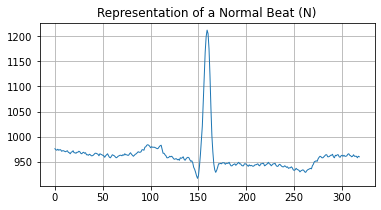

In [12]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Normal Beat (N)")
plt.plot(X[0])
print(classes[Y[0]])

A


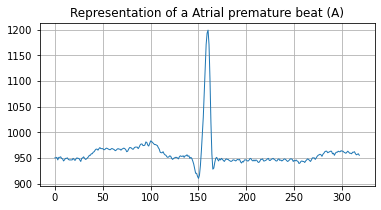

In [13]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Atrial premature beat (A)")
plt.plot(X[6])
print(classes[Y[6]])

L


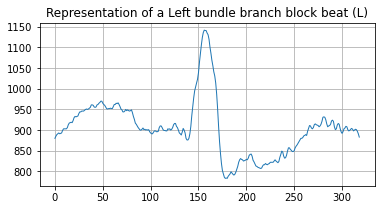

In [14]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Left bundle branch block beat (L)")
plt.plot(X[16165])
print(classes[Y[16165]])

V


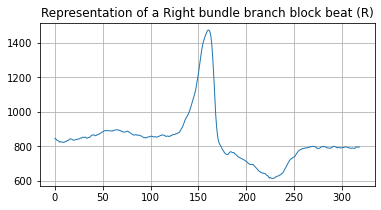

In [15]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Right bundle branch block beat (R)")
plt.plot(X[20980])
print(classes[Y[20980]])

V


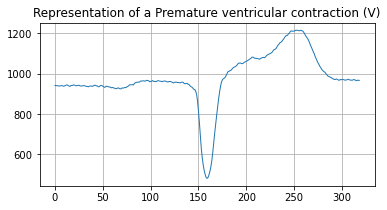

In [16]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Premature ventricular contraction (V)")
plt.plot(X[1905])
print(classes[Y[1905]])

/


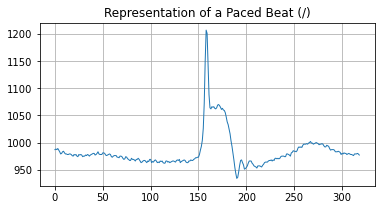

In [17]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Paced Beat (/)")
plt.plot(X[4133])
print(classes[Y[4133]])

## Viewing the data

In [18]:
for i in range(0, len(X)):
    X[i].append(Y[i])

print(np.shape(X))


(42021, 320)


0    9997
1    8071
2    7255
4    7129
5    7023
3    2546
Name: 319, dtype: int64


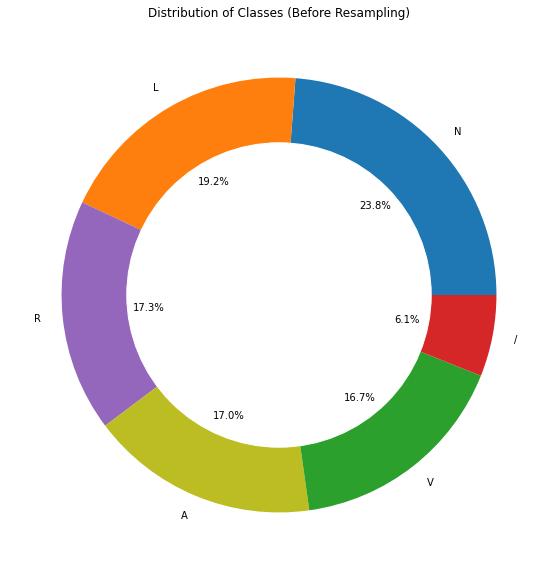

In [32]:
# representation of classes % wise
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Classes (Before Resampling)")
plt.show()

## Resampling the Data

In [20]:
from sklearn.utils import resample

# df_1=X_train_df[X_train_df[319]==1]
# df_2=X_train_df[X_train_df[319]==2]
# df_3=X_train_df[X_train_df[319]==3]
# df_4=X_train_df[X_train_df[319]==4]
# df_5=X_train_df[X_train_df[319]==5]
# df_0=(X_train_df[X_train_df[319]==0]).sample(n=1000,random_state=42)

# df_1_upsample=resample(df_1,replace=True,n_samples=1000,random_state=122)
# df_2_upsample=resample(df_2,replace=True,n_samples=1000,random_state=123)
# df_3_upsample=resample(df_3,replace=True,n_samples=1000,random_state=124)
# df_4_upsample=resample(df_4,replace=True,n_samples=1000,random_state=125)
# df_5_upsample=resample(df_5,replace=True,n_samples=1000,random_state=126)

df_1=(X_train_df[X_train_df[319]==1]).sample(n=1000,random_state=47)
df_2=(X_train_df[X_train_df[319]==2]).sample(n=1000,random_state=46)
df_3=(X_train_df[X_train_df[319]==3]).sample(n=1000,random_state=45)
df_4=(X_train_df[X_train_df[319]==4]).sample(n=1000,random_state=44)
df_5=(X_train_df[X_train_df[319]==5]).sample(n=1000,random_state=43)
df_0=(X_train_df[X_train_df[319]==0]).sample(n=1000,random_state=42)

# X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])
X_train_df=pd.concat([df_0,df_1,df_2,df_3,df_4,df_5])

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: 319, dtype: int64


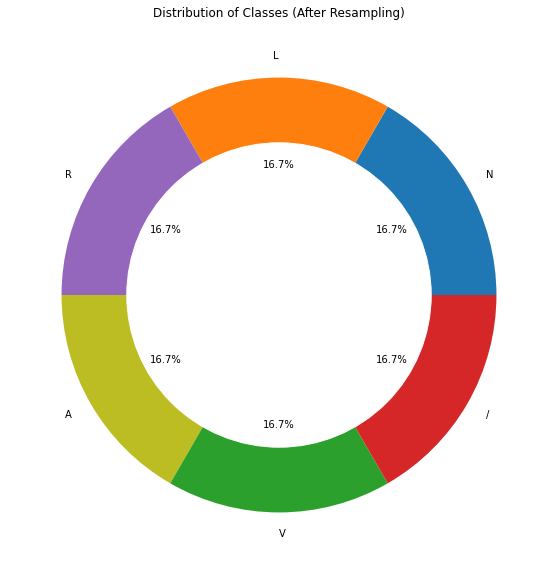

In [21]:
per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Classes (After Resampling)")
plt.show()

## Train Test Split

In [22]:
# Train Test Split
train, test = train_test_split(X_train_df, test_size=0.2)
print("X_train : ", len(train))
print("X_test  : ", len(test))

X_train :  4800
X_test  :  1200


In [23]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
print(np.shape(X_train), np.shape(X_test))

(4800, 319) (1200, 319)


In [24]:
#One Hot Encoding of Classes
enc = OneHotEncoder()
Y_train = enc.fit_transform(train[[319]]).toarray()
Y_test = enc.fit_transform(test[[319]]).toarray()
print(np.shape(Y_train), np.shape(Y_test))

(4800, 6) (1200, 6)


## ELM Implementation (From elm.py)

In [25]:
#ELM Variables
input_length = X_train.shape[-1]
num_classes = 6
num_hidden_layers = 1200

In [26]:
# Creating Instance of ELM Model
model = elm.ELM(
    input_length,
    num_hidden_layers,
    num_classes,
    activation = "sigmoid"
)

In [27]:
# Train
model.fit(X_train, Y_train, display_time=True)
train_loss, train_acc, rmse = model.evaluate(X_train, Y_train)
print('RMSE: %f' % rmse)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

C:\Users\Arijit Jana\Desktop\Project\elm.py:14: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


Train time: 1.7958619594573975
RMSE: 0.000035
train loss: 0.180738
train acc: 0.929375


In [28]:
# Validation
val_loss, val_acc, rmse = model.evaluate(X_test, Y_test)
print('RMSE: %f' % rmse)
print('val loss: %f' % val_loss)
print('val acc: %f' % (val_acc*100))

RMSE: 0.000000
val loss: 637883926.527097
val acc: 89.666667


In [29]:
beta, w, bais = model.get_weights()

In [30]:
# Visual Prediction
ttest = X_test[:5]
ttres = Y_test[:5]
predict = model(ttest)

Text(0.5, 1.0, 'Predicted Label: / | Actual Label: /')

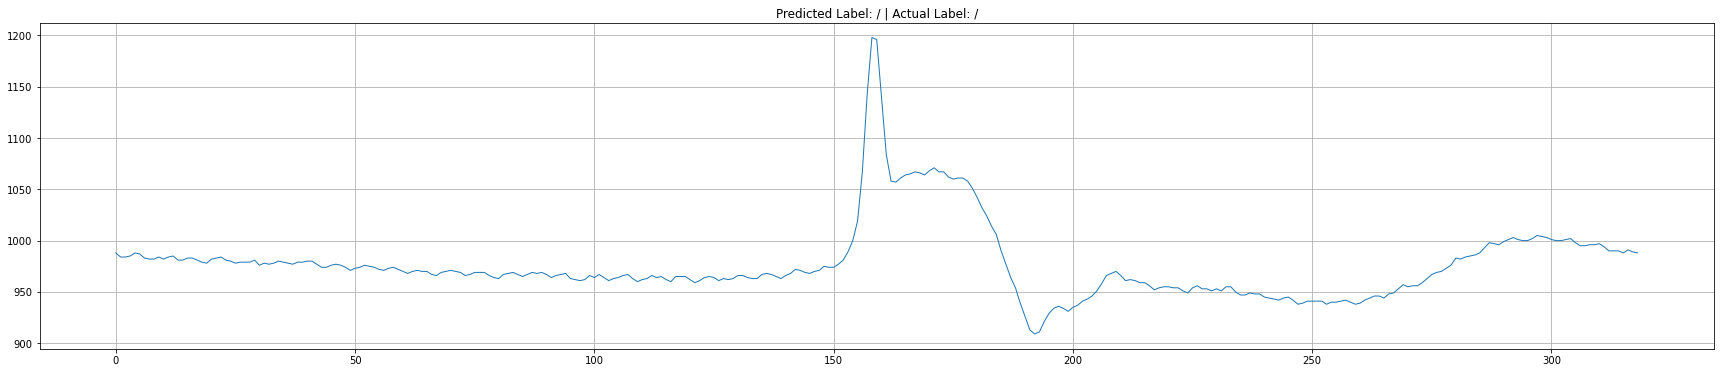

In [31]:
plt.plot(ttest[0])
plt.title("Predicted Label: {} | Actual Label: {}".format(classes[np.argmax(predict[0])],classes[np.argmax(ttres[0])]))

## ELM Implementation (From hpelm library)

In [27]:
pip install hpelm

Note: you may need to restart the kernel to use updated packages.


In [80]:
from hpelm import elm as ELM
import itertools

In [81]:
elm = ELM.ELM(X_train.shape[1], Y_train.shape[1], classification='ml')
elm.add_neurons(500, "sigm")
elm.train(X_train, Y_train, 'ml', "OP")

C:\Users\Arijit Jana\anaconda3\lib\site-packages\hpelm\nnets\slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))


Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


C:\Users\Arijit Jana\anaconda3\lib\site-packages\hpelm\nnets\slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


In [82]:
predicted = elm.predict(X_test)
mse = elm.error(predicted, Y_test)
rmse = math.sqrt(mse)
print("Fitness: ",rmse)

Fitness:  0.25954019170662396


In [83]:
elm.project(X_test).shape

(1200, 500)

In [84]:
cm = elm.confusion(predicted, Y_test)
cm

array([[111.,   5.,   4.,  18.,   4.,   0.],
       [  1., 135.,   5.,   0.,  16.,   0.],
       [  1.,   1., 146.,  10.,   2.,   1.],
       [  3.,   6.,  19., 123.,   3.,   1.],
       [  1.,   7.,   0.,   1., 150.,   0.],
       [  1.,   2.,   0.,   8.,   4., 174.]])

Normalized confusion matrix


C:\Users\Arijit Jana\AppData\Local\Temp\ipykernel_11912\2519463306.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


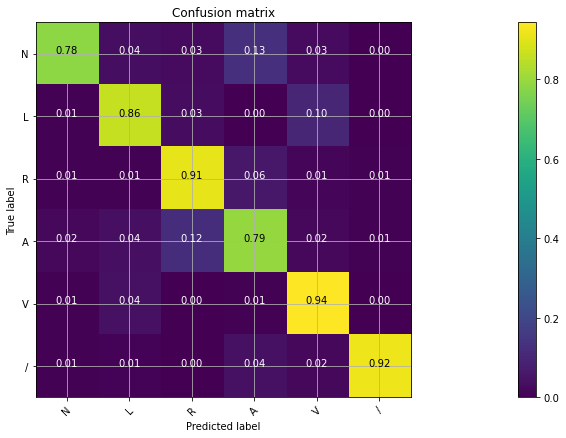

In [86]:
plot_confusion_matrix(cm, classes, True)

In [35]:
acc = np.sum(np.argmax(predicted, axis=-1) == np.argmax(Y_test, axis=-1)) / len(Y_test)

In [36]:
print("Accuracy of the model {}".format(acc*100))

Accuracy of the model 82.66666666666667


## Implementation of DEA (Differential Evolution Algorithm)

In [38]:
# input
# X_train
# DE parameters NP, CR, F, max num of func evaluation FES
# output
# classification result 

In [37]:
#--- Step (1) : Initialization ---+
numberOfHiddenNuerons = 400
numberOfInputNuerons = X_train.shape[1]
XRmin = -1
XRmax = 1
NP = 100

D = numberOfHiddenNuerons * (numberOfInputNuerons+1)
pop = np.zeros((NP,D))
XRRmin = npm.repmat(XRmin,NP,D)
XRRmax = npm.repmat(XRmax,NP,D)
pop = XRRmin+(XRRmax-XRRmin) * np.random.rand(NP,D)

# popold = np.zeros(np.shape(pop)) # toggle population
# val = np.zeros((NP))             # create and reset "cost array"
# DE_gbest = np.zeros((1,D))       # best population member ever
# nfeval = 0                       # number of function evolution

In [38]:
import time
import elm

GEN = 8 # Number of generations
F = 0.8 # control parameter [0.4,1]
CR = 0.7 # Crossover probability
gen_scores = []
total_time = 0

print("No. of hidden Nuerons: ", numberOfHiddenNuerons)
print("NP: ",NP)
print("Gen: ", GEN)
print("F: ", F)
print("CR: ", CR)

for k in range(GEN):
    print("\nGENERATION: ",k)
    start = time.time()
    #--- STEP 2.1: Mutation -> calculate mutant vector ---+
    u_mutant = np.zeros(np.shape(pop)) # shape : (100, 16000) | mutant vector
    popold = pop
    for i in range(NP):
        candidates = list(range(NP))
        candidates.remove(i)
        randomIndex = random.sample(candidates, 3)
        v1 = popold[randomIndex[0]] #v_r_1
        v2 = popold[randomIndex[1]] #v_r_2
        v3 = popold[randomIndex[2]] #v_r_3
        u_mutant[i] = v1 + F * (v2 - v3)
        
        #--- STEP 2.2: Crossover -> calculate trial vector ---+
        q_trial = np.zeros((D))
        r = random.uniform(0,1)          # random number between 0 to 1
        delta = random.sample(list(range(D)), 1)
        #--- Binomial Crossover ---+
        for j in range(len(u_mutant[i])):
            if(r <= CR or j == delta):
                q_trial[j] = popold[i][j]
            else:
                q_trial[j] = u_mutant[i][j]

        # q_trial = ensure_bounds(q_trial)
        
        #--- STEP 2.3: Selection -> Selection between trail and popold ---+
        trial_fitness, trail_outputWeight = get_elm_fitness(q_trial)
        target_fitness, target_outputWeight = get_elm_fitness(popold[i])
        if trial_fitness >= target_fitness:
            pop[i] = q_trial  
    
    #Stop time
    stop = time.time()
    print(f"Time : {stop-start}")
    total_time += (stop-start)
print("\n TOTAL TIME: ",total_time)

No. of hidden Nuerons:  400
NP:  100
Gen:  8
F:  0.8
CR:  0.7

GENERATION:  0


C:\Users\Arijit Jana\Desktop\Project\elm.py:14: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


Time : 189.73339891433716

GENERATION:  1
Time : 169.9521336555481

GENERATION:  2
Time : 170.8182156085968

GENERATION:  3
Time : 169.49375820159912

GENERATION:  4
Time : 172.3361599445343

GENERATION:  5
Time : 171.36778783798218

GENERATION:  6
Time : 182.15286660194397

GENERATION:  7
Time : 177.51032257080078

 TOTAL TIME:  1403.3646433353424


In [39]:
#--- Evaluate the best member ---+
ibest = 0
val = np.zeros((NP))
val[0], outputWeight = get_elm_fitness(pop[ibest,:])
DE_gbestval = val[0]
bestWeight = outputWeight
for i in range(1,NP):
    val[i],outputWeight = get_elm_fitness(pop[i,:])
    if(val[i] > DE_gbestval):
        ibest = i
        DE_gbestval = val[i]
        bestWeight = outputWeight

DE_gbest = pop[ibest, :]

In [40]:
DE_gbestval

0.00017361111111111112

In [41]:
def final_elm_fitness(weightBais, bestWeight=0):
    tempWeightBais = weightBais.reshape(numberOfHiddenNuerons,numberOfInputNuerons+1, order="F")
    inputWeight = tempWeightBais[:,:numberOfInputNuerons]                 
    baisOfHiddenNuerons = tempWeightBais[:,numberOfInputNuerons]
    
    #--- Create Instance of ELM Model ---+
    model = elm.ELM(
        X_train.shape[1],
        numberOfHiddenNuerons,
        classes_len,
        activation = "sigmoid",
        w_init=np.transpose(inputWeight),
        bias_init=baisOfHiddenNuerons,
        # beta_init=bestWeight
    )

    #--- Train ---+
    model.fit(X_train, Y_train)
    #--- Predict and Evaluate ---+
    loss, acc, fitness = model.evaluate(X_test, Y_test)
    Y_pred = model(X_test)
    return loss, acc, fitness, Y_pred

RMSE: 0.000278
train acc: 0.800000
Normalized confusion matrix


C:\Users\Arijit Jana\AppData\Local\Temp\ipykernel_9728\2519463306.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


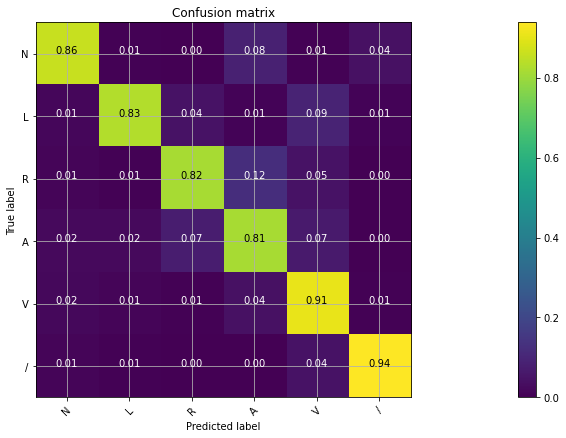

In [42]:
import elm
loss, acc, fitness, Y_pred = final_elm_fitness(DE_gbest, bestWeight)
print('RMSE: %f' % fitness)
print('train acc: %f' % acc)
cm = confusion_matrix(Y_pred, Y_test)
plot_confusion_matrix(cm, classes, True)

In [43]:
np.save('./bestWeight.npy', DE_gbest)

In [44]:
weight = np.load('bestWeight-88.npy')

192000
RMSE: 0.000000
train acc: 0.855833
Normalized confusion matrix


C:\Users\Arijit Jana\AppData\Local\Temp\ipykernel_9728\2519463306.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


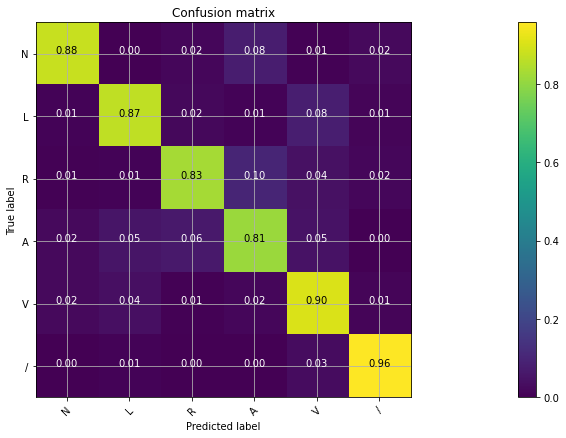

In [45]:
numberOfHiddenNuerons = 600
numberOfInputNuerons = X_train.shape[1]
XRmin = -1
XRmax = 1
NP = 50

D = numberOfHiddenNuerons * (numberOfInputNuerons+1)
print(D)
pop = np.zeros((NP,D))
XRRmin = npm.repmat(XRmin,NP,D)
XRRmax = npm.repmat(XRmax,NP,D)
pop = XRRmin+(XRRmax-XRRmin) * np.random.rand(NP,D)

loss, acc, fitness, Y_pred = final_elm_fitness(weight)
print('RMSE: %f' % fitness)
print('train acc: %f' % acc)
cm = confusion_matrix(Y_pred, Y_test)
plot_confusion_matrix(cm, classes, True)

In [46]:
type(X_train)

numpy.ndarray

In [47]:
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)

np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)